# KerasでMnistデータを学習(全結合型NN)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.5892 - acc: 0.8555 - val_loss: 0.3409 - val_acc: 0.9099
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3306 - acc: 0.9087 - val_loss: 0.3016 - val_acc: 0.9143
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.3016 - acc: 0.9157 - val_loss: 0.2864 - val_acc: 0.9214
Epoch 4/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2884 - acc: 0.9195 - val_loss: 0.2803 - val_acc: 0.9228
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2803 - acc: 0.9217 - val_loss: 0.2748 - val_acc: 0.9237
Epoch 6/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.2748 - acc: 0.9239 - val_loss: 0.2737 - val_acc: 0.9243
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.2708 - acc: 0.9252 - val_loss: 0.2741 - val_acc

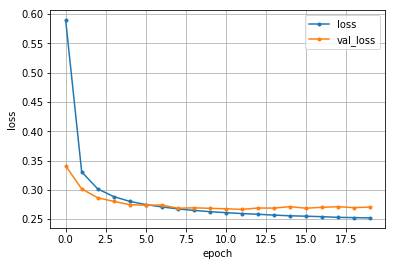

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
# MNISTデータを読込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train  = x_train.reshape(60000, 784)#トレーニングデータを60000行784列の行列に変形
x_test   = x_test.reshape(10000, 784)#テストデータを10000行784列の行列に変形
x_train  = x_train.astype('float32')#データをfloat型に変換
x_test   = x_test.astype('float32')#同上
x_train /= 255#データの範囲を0~255から0~1に変換
x_test  /= 255#同上
y_train  = keras.utils.to_categorical(y_train, 10)#答えのデータを0,1に変換
y_test   = keras.utils.to_categorical(y_test, 10)#同上

# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(784,)))#入力を784次元にする
model.add(Dense(10, activation='softmax'))#出力は10次元で、それぞれsoftmax関数を損失関数とする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 学習
epochs = 20#60000のトレーニングデータを20周する
batch_size = 128#60000のデータを128個ずつ学習する
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# 検証
score = model.evaluate(x_test, y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']

nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# KerasでCIFAR10を学習

# (https://newtechnologylifestyle.net/cifar-10%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E3%82%BB%E3%83%83%E3%83%88%E3%82%92%E7%94%A8%E3%81%84%E3%81%A6cnn%E3%81%AE%E7%94%BB%E5%83%8F%E8%AA%8D%E8%AD%98%E3%82%92%E8%A1%8C%E3%81%A3%E3%81%A6%E3%81%BF/)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 53us/step - loss: 6.1080 - acc: 0.2263 - val_loss: 6.0876 - val_acc: 0.2761
Epoch 2/20
50000/50000 [==============================] - 2s 43us/step - loss: 6.0635 - acc: 0.2708 - val_loss: 6.0802 - val_acc: 0.2956
Epoch 3/20
50000/50000 [==============================] - 2s 44us/step - loss: 6.0462 - acc: 0.2834 - val_loss: 6.1821 - val_acc: 0.2781
Epoch 4/20
50000/50000 [==============================] - 2s 49us/step - loss: 6.0310 - acc: 0.2902 - val_loss: 6.0213 - val_acc: 0.3009
Epoch 5/20
50000/50000 [==============================] - 2s 48us/step - loss: 6.0215 - acc: 0.2999 - val_loss: 6.0584 - val_acc: 0.2484
Epoch 6/20
50000/50000 [==============================] - 2s 42us/step - loss: 6.0204 - acc: 0.3026 - val_loss: 6.0020 - val_acc: 0.3122
Epoch 7/20
50000/50000 [==============================] - 2s 41us/step - loss: 6.0681 - acc: 0.3071 - val_loss: 6.0250 - val_acc

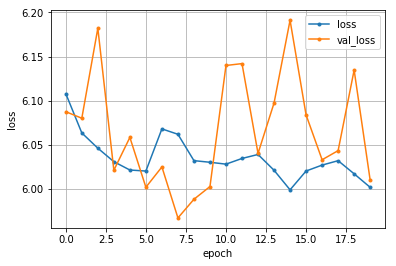

In [9]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

X_train  = X_train.reshape(50000, 3072)#トレーニングデータを60000行784列の行列に変形
X_test   = X_test.reshape(10000, 3072)#テストデータを10000行784列の行列に変形
X_train  = X_train.astype('float32')#データをfloat型に変換
X_test   = X_test.astype('float32')#同上
X_train /= 255#データの範囲を0~255から0~1に変換
X_test  /= 255#同上
Y_train  = keras.utils.to_categorical(Y_train, 10)#答えのデータを0,1に変換
Y_test   = keras.utils.to_categorical(Y_test, 10)#同上

# モデルの構築
model = Sequential()
model.add(InputLayer(input_shape=(3072,)))#入力を784次元にする
model.add(Dense(10, activation='relu'))#出力は10次元で、それぞれsoftmax関数を損失関数とする
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# 学習
epochs = 20#60000のトレーニングデータを20周する
batch_size = 128#60000のデータを128個ずつ学習する
history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))

# 検証
score = model.evaluate(X_test, Y_test, verbose=1)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss     = history.history['loss']
val_loss = history.history['val_loss']
nb_epoch = len(loss)
plt.plot(range(nb_epoch), loss,     marker='.', label='loss')
plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 全結合層でCIFAR10は識別できない。逆にMNISTが非常に簡単なデータだと分かった